In [2]:
intro_images_path='../dataset_part1/Images/Intro_images/'
edge_images_path='../dataset_part1/Images/Edge_images/'
seg_images_path='../dataset_part1/Images/Seg_images/'
feature_images_path='../dataset_part1/Images/Feature_images/'

output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2023/24


<img src="./Logotipo_Solo.png" width=200/>

### EXERCISE: Template matching and Gaussian pyramid

Based on the exercises about template matching and the construction of Gaussian pyramids try to detect as much tunas as posible in the image Tuna_Relative_Sizes.jpg given the template in Tuna_template.jpg.

Image Shape: (3564, 2971)
Layer Shape: (3564, 2971)


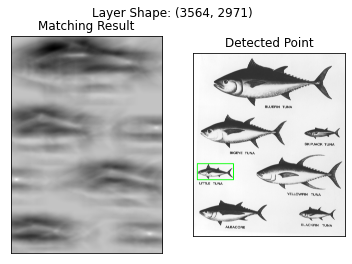

Layer Shape: (3564, 2971)


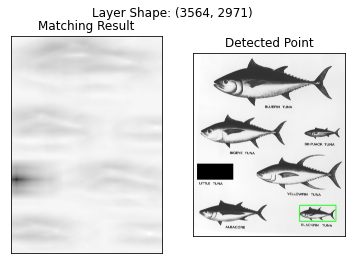

Layer Shape: (3564, 2971)


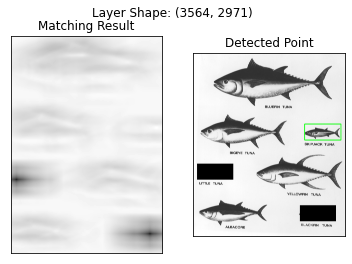

Layer Shape: (3564, 2971)
Layer Shape: (1782, 1486)


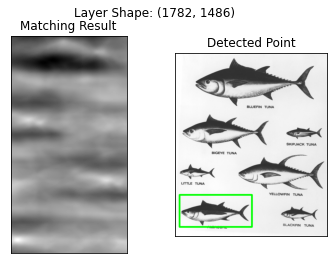

Layer Shape: (1782, 1486)


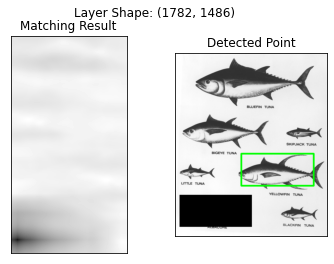

Layer Shape: (1782, 1486)


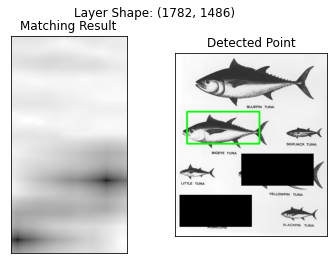

Layer Shape: (1782, 1486)
Layer Shape: (891, 743)


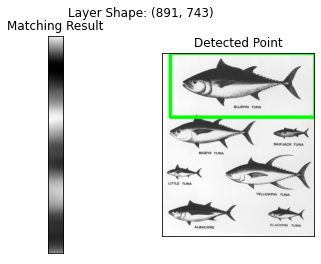

Layer Shape: (891, 743)
(446, 372)
312 703
break for


In [5]:
#Import modules
import cv2
import numpy as np
from matplotlib import pyplot as plt


#Piramid function
def pyramid_bf(image, l=5, minSizex=8, minSizey=8):
    level = 0
    yield image
    while True:
        if level == l or image.shape[0] < minSizex or image.shape[1] < minSizey:
            break

        image = cv2.GaussianBlur(image,(5,5),0)
        h, w = image.shape[:2]
        image = image[:h+1:2, :w+1:2]
        yield image
        level += 1

#Detection function
def detect_object_in_pyramid(image_path, template_path):
    template = cv2.imread(template_path, 0)
    w, h = template.shape[::-1]

    # Cargar la imagen como un arreglo NumPy
    image = cv2.imread(image_path, 0)
    
    print(f'Image Shape: {image.shape}')
    # Generar pirámide de la imagen
    for layer in pyramid_bf(image, l=3):
        deteccion=True
        break_for=False
        contador=0

        #While we detect something in the image, we don't apply the piramid function to the image
        while deteccion:

            copia_img=layer.copy()
            # Convertir la capa a un arreglo NumPy
            layer_np = np.array(layer)

            # Verificar dimensiones antes de la coincidencia de plantillas
            if layer_np.shape[0] < h or layer_np.shape[1] < w:
                print(layer_np.shape)
                print(h,w)
                break_for=True
                break
            
            print(f'Layer Shape: {layer_np.shape}')

            # Aplicar coincidencia de plantillas con el método cv2.TM_CCOEFF_NORMED
            method = cv2.TM_CCORR_NORMED
            res = cv2.matchTemplate(layer_np, template, method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            
            #Detection condition, at first the accuracy of the detection is low because its is probably to detect something
            #In each detection, the accuracy increases to avoid detect incorrect things.
            if max_val<0.94+contador*0.003:
                deteccion=False
                break

            # Obtener ubicación de la coincidencia
            top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)

            # Dibujar rectángulo en la imagen original
            img_color = cv2.cvtColor(layer_np, cv2.COLOR_GRAY2RGB)
            cv2.rectangle(img_color, top_left, bottom_right, [0, 255, 0], 15)

            # Mostrar resultados
            plt.subplot(121), plt.imshow(res, cmap='gray')
            plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
            plt.subplot(122), plt.imshow(img_color, cmap='gray')
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            plt.suptitle(f'Layer Shape: {layer_np.shape}')
            plt.show()

            # Eliminar la región detectada de la imagen
            copia_img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0
            layer = copia_img
            contador=contador+1

        if break_for:
            print("break for")
            break
            
        

# Rutas de las imágenes
image_path = intro_images_path+'Tuna_Relative_Sizes.jpg'
template_path = intro_images_path+'Tuna_template.jpg'

# Llamar a la función con las rutas de las imágenes
detect_object_in_pyramid(image_path, template_path)


In this exercise, we use TM_CCORR_NORMED method, to find all the tunas in the image. The main function, takes the image and the template and use this method to find the tunas. To find all tunas, we need to use a piramid function to change the size of the image and make it more small. Before apply the piramid function, we try to find a tuna in the image, if a tuna is detected, this part of the image is changed to black and then we repeat the same process until we don't detect any tuna. When any tuna is detected, the image is rescaled using the piramid function.